# Preprocessing

In [ ]:
!pip install pyclustertend
#Restart runtime after running this cell

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 80.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 82.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 99.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 63.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.3/26.3 MB 16.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.39.1
    Uninstalling llvmlite-0.39.1:
      Successfully uninstalled llvmlite-0.39.1
  Attempting uninstall: nu

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
af=pd.read_csv('/content/final_audio_features.csv')
af=af.drop(['mode','type'],axis=1)
af['genre']=af['genre'].fillna(value='UD')
song_links=af.pop('uri')

In [ ]:
def partial(lst, query):
    return [s for s in lst if query in s]

In [ ]:
all=list(af['genre'])
result=[]
for any in all:
  if ',' in any:
    temp=any.split(',',1)
    if 'rock' in temp:
      result.append('rock')
    elif partial(temp,'rock'):
      result.append('rock')
    elif partial(temp,'accoustic'):
      result.append('accoustic')
    elif 'pop' in temp:
      result.append('pop')
    elif partial(temp,'pop'):
       result.append('pop')
    elif partial(temp,'hip hop'):
       result.append('hip hop')
    elif partial(temp,'house'):
       result.append('house')
    elif partial(temp,'rap'):
       result.append('rap')
    elif partial(temp,'indie'):
       result.append('indie')
    else: result.append(temp[0])
  else: result.append(any)
af['genre']=result

In [ ]:
af

,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,genre
0,0.722,0.2880,96.957,0.0438,0.16900,0.000170,4,0.600,1,267960,-4.865,0.388,pop
1,0.809,0.1020,96.947,0.0364,0.00956,0.002150,4,0.633,9,228397,-7.645,0.471,pop
2,0.387,0.1300,109.959,0.0277,0.23900,0.007560,4,0.762,10,239147,-8.643,0.274,indie
3,0.782,0.1080,98.976,0.0397,0.27700,0.000005,4,0.746,6,214510,-6.192,0.665,pop
4,0.904,0.0693,110.034,0.0620,0.01000,0.013600,4,0.658,2,260720,-4.662,0.208,rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3157,0.181,0.7100,89.845,0.2720,0.78100,0.010900,4,0.613,2,211226,-17.510,0.330,rock
3158,0.874,0.0935,113.974,0.0348,0.39700,0.047600,4,0.702,8,221642,-8.803,0.779,pop
3159,0.566,0.2680,94.948,0.0334,0.36900,0.000000,4,0.643,9,204632,-6.859,0.305,pop
3160,0.328,0.2230,85.988,0.0326,0.52300,0.000000,4,0.706,0,235467,-10.158,0.593,canadian folk


In [ ]:
af.groupby('genre').size()

genre
UD                  358
a cappella            2
acoustic cover        4
acoustic opm          2
acoustic pop          2
                   ... 
vapor trap            2
vegas indie           2
video game music      4
viral pop             6
viral rap             2
Length: 149, dtype: int64

<ipython-input-7-f0ce0e6dd7a3>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  af.hist(ax = ax)


array([[<AxesSubplot: title={'center': 'energy'}>,
        <AxesSubplot: title={'center': 'liveness'}>,
        <AxesSubplot: title={'center': 'tempo'}>],
       [<AxesSubplot: title={'center': 'speechiness'}>,
        <AxesSubplot: title={'center': 'acousticness'}>,
        <AxesSubplot: title={'center': 'instrumentalness'}>],
       [<AxesSubplot: title={'center': 'time_signature'}>,
        <AxesSubplot: title={'center': 'danceability'}>,
        <AxesSubplot: title={'center': 'key'}>],
       [<AxesSubplot: title={'center': 'duration_ms'}>,
        <AxesSubplot: title={'center': 'loudness'}>,
        <AxesSubplot: title={'center': 'valence'}>]], dtype=object)

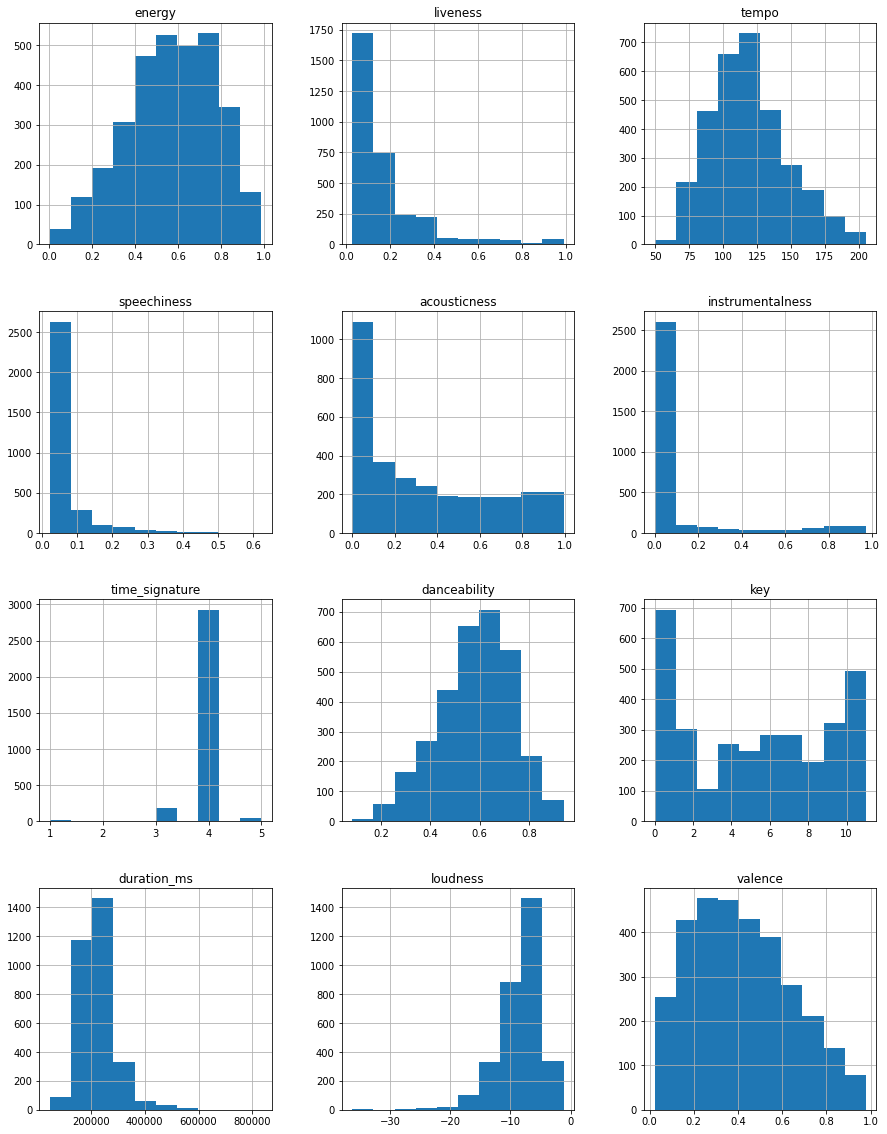

In [ ]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
af.hist(ax = ax)

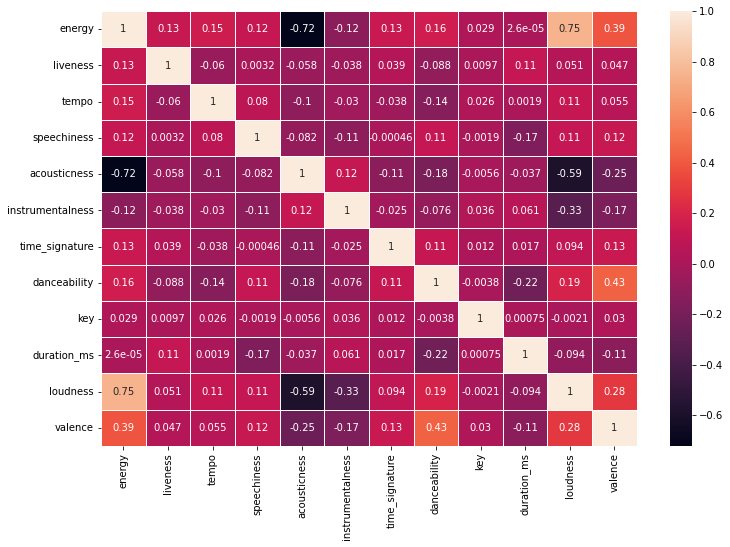

In [ ]:
corr_matrix=af.corr()
fig, ax = plt.subplots(figsize=(12,8))
sn.heatmap(corr_matrix, annot=True, linewidths=.5, ax=ax)
plt.show()

In [ ]:
af.pop('genre')

0                 pop
1                 pop
2               indie
3                 pop
4                rock
            ...      
3157             rock
3158              pop
3159              pop
3160    canadian folk
3161              pop
Name: genre, Length: 3162, dtype: object

# Kmeans

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(af)
scaled=scaler.transform(af)

In [ ]:
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from random import sample
from numpy.random import uniform

In [ ]:
def elbowPlot(range_, data, figsize=(10,10)):
    inertia_list = []
    for n in range_:
        kmeans = KMeans(n_clusters=n, random_state=42)
        kmeans.fit(data)
        inertia_list.append(kmeans.inertia_)

    # plotting
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    sns.lineplot(y=inertia_list, x=range_, ax=ax)
    ax.set_xlabel("Cluster")
    ax.set_ylabel("Inertia")
    ax.set_xticks(list(range_))
    fig.show()
    fig.savefig("elbow_plot.png")

In [ ]:
af.shape[0]

3162

In [ ]:
from pyclustertend import hopkins ## the hopkins test
hopkins(af,af.shape[0])

0.0

In [ ]:
import warnings
warnings.filterwarnings("ignore")

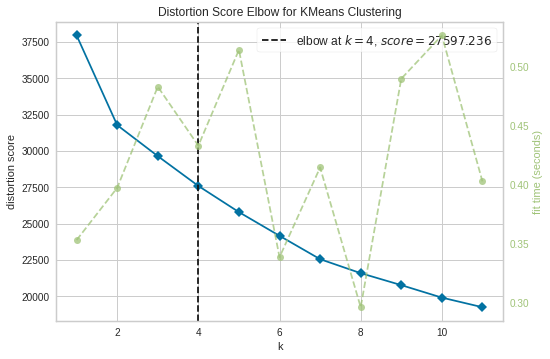

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(scaled)        # Fit the data to the visualizer
visualizer.show()

For n_clusters = 2 The average silhouette_score is : 0.18514842451242317
For n_clusters = 3 The average silhouette_score is : 0.12943279608915767
For n_clusters = 4 The average silhouette_score is : 0.1805946100669026
For n_clusters = 5 The average silhouette_score is : 0.1806058049972688


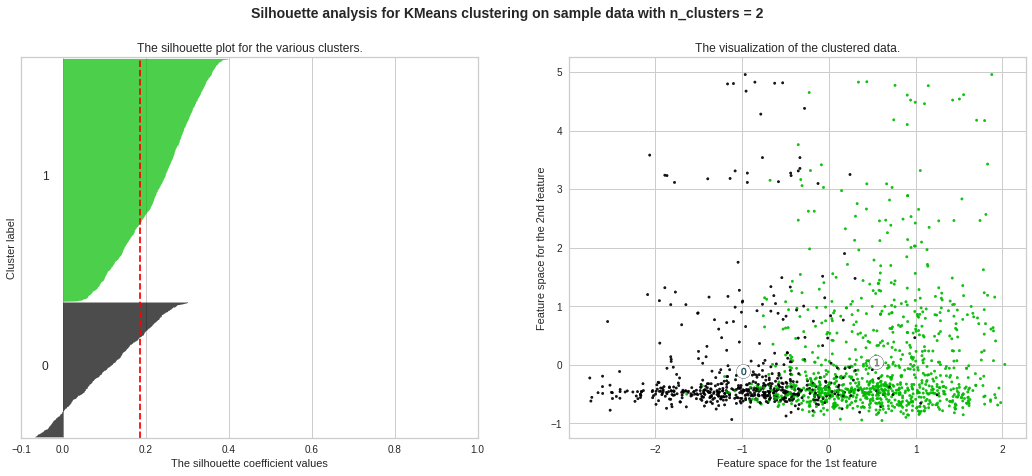

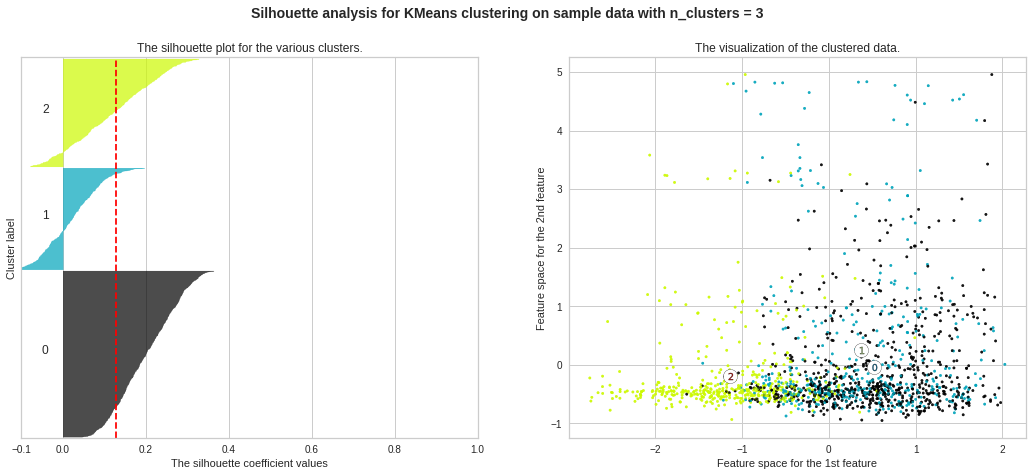

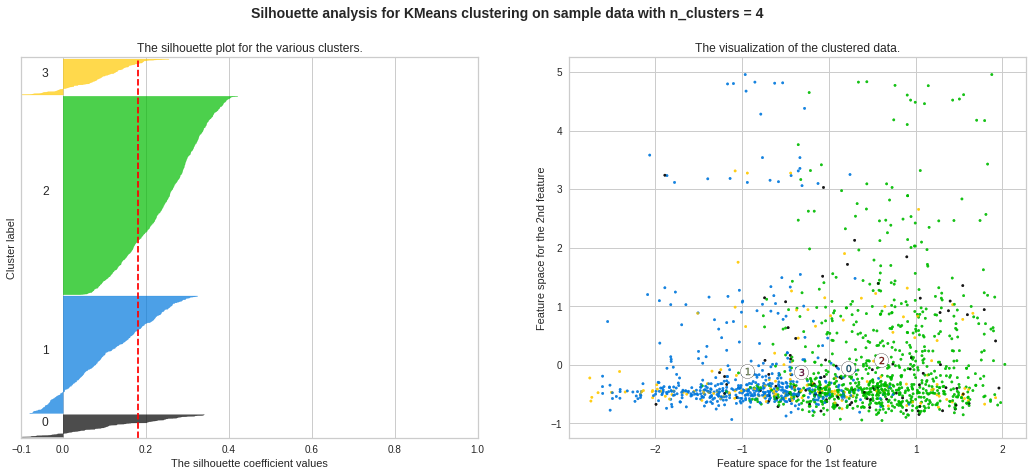

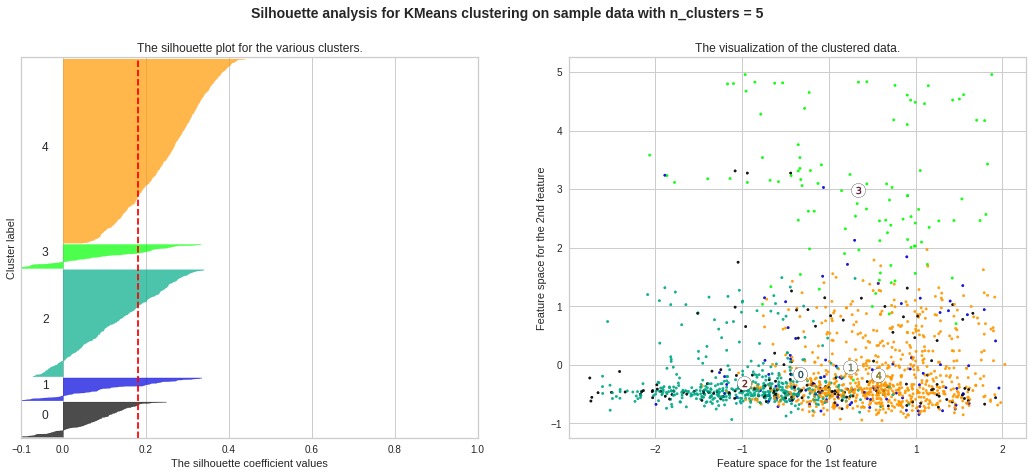

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
range_n_clusters = [2,3,4,5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(scaled, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        scaled[:, 0], scaled[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [ ]:
import sklearn.metrics
nc=range(2,6)
clusters=[]
for n in nc:
  kmeans = KMeans(init="random",n_clusters=n)
  kmeans.fit(scaled)
  labels=kmeans.labels_
  print("For",n,"Clusters:",sklearn.metrics.calinski_harabasz_score(scaled, labels))

For 2 Clusters: 613.2691723724313
For 3 Clusters: 442.070481276638
For 4 Clusters: 390.8245221687286
For 5 Clusters: 369.432542659586


In [ ]:
#Perfroming Clustering Now wiith 2 Clusters
kmeans = KMeans(init="random",n_clusters=2)
kmeans.fit(scaled)
labels=kmeans.labels_
af['Clusters 2']=labels

In [ ]:
#Perfroming Clustering Now wiith 4 Clusters
kmeans = KMeans(init="random",n_clusters=4)
kmeans.fit(scaled)
labels=kmeans.labels_
af['Clusters 4']=labels

In [ ]:
fig = px.scatter_3d(af, x='energy', y='instrumentalness', z=  'acousticness',
              color='Clusters 2')
fig.show()

In [ ]:
fig = px.scatter_3d(af, x='energy', y='instrumentalness', z=  'acousticness',
              color='Clusters 4')
fig.show()

# Aglomerative

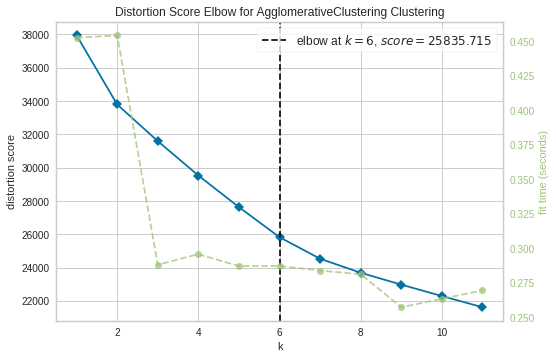

<AxesSubplot: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
#sil test
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(scaled)        # Fit the data to the visualizer
visualizer.show()

In [ ]:
#Aglomerative comparison
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=4)
clustering.fit(scaled)
labels=clustering.labels_
af['Aglom Clusters 4']=labels

In [ ]:

fig = px.scatter_3d(af, x='energy', y='instrumentalness', z=  'acousticness',
              color='Aglom Clusters 4')
fig.show()


In [ ]:
#Aglomerative comparison
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=6)
clustering.fit(scaled)
labels=clustering.labels_
af['Aglom Clusters 6']=labels

In [ ]:
import plotly.express as px
fig = px.scatter_3d(af, x='energy', y='instrumentalness', z=  'acousticness',
              color='Aglom Clusters 6')
fig.show()


Comparing the results of two algorithms we can see that both of them work best for 4 clusters. In order to compare the clustering results in detail we will have to use dimension reduction techniques to visualise the data in a better way.

# Dimension Reduction

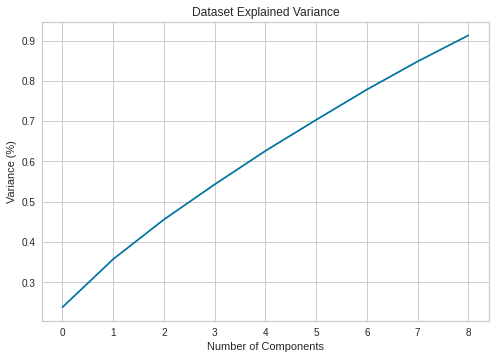

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=.90)
principalComponents = pca.fit_transform(scaled) # Plot the explained variances

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.show()

In [ ]:
pca.n_components_

9

For ease of visualization using 3 principal components. From the above graph we can see that they still retain arround 50 percent of the actuall varience in the dataset

In [ ]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3',])

In [ ]:
principalDf

,principal component 1,principal component 2,principal component 3
0,-1.048305,0.741494,-0.867631
1,-1.289669,0.084072,-0.660901
2,0.308822,-0.531651,-0.628615
3,-1.538149,-0.880374,-0.812058
4,-1.582791,0.708957,-0.043004
...,...,...,...
3157,2.299854,-1.462330,-0.486389
3158,-1.328339,-0.758487,-0.642724
3159,-0.103253,-0.154503,-0.778450
3160,0.735248,-1.253878,-1.330910


In [ ]:
principalDf['Aglom Clusters 4']=af['Aglom Clusters 4']

In [ ]:
import plotly.express as px
fig = px.scatter_3d(principalDf, x='principal component 1', y='principal component 2', z=  'principal component 3',
              color='Aglom Clusters 4')
fig.show()

In [ ]:
from sklearn.manifold import MDS # for MDS dimensionality reduction
### Step 1 - Configure MDS function, note we use default hyperparameter values for this example
model2d=MDS(n_components=3,
          metric=True,
          n_init=4,
          max_iter=600,
          verbose=0,
          eps=0.001,
          n_jobs=None,
          random_state=42,
          dissimilarity='euclidean')

### Step 2 - Fit the data and transform it, so we have 2 dimensions instead of 3
X_trans = model2d.fit_transform(scaled)

### Step 3 - Print a few stats
print('The new shape of X: ',X_trans.shape)
print('No. of Iterations: ', model2d.n_iter_)
print('Stress: ', model2d.stress_)

The new shape of X:  (3162, 3)
No. of Iterations:  590
Stress:  4303428.102856161


In [ ]:
mds=pd.DataFrame(X_trans)
mds['Aglom Clusters 4']=af['Aglom Clusters 4']

In [ ]:
mds

,0,1,2,Aglom Clusters 4
0,0.293541,1.704838,0.927867,0
1,0.266525,1.298155,-0.920875,0
2,0.467812,-1.239689,-0.826581,0
3,1.586429,1.023131,-0.779662,0
4,-0.394598,2.419752,0.254861,0
...,...,...,...,...
3157,3.943013,-4.650661,0.438459,0
3158,1.811902,0.826850,-1.447345,0
3159,0.257588,-0.288468,-0.132044,0
3160,2.037981,-1.034507,1.155834,1


In [ ]:
import plotly.express as px
fig = px.scatter_3d(mds, x=0, y=1, z=2,
              color='Aglom Clusters 4')
fig.show()

This example is a very good identification of how dimension reduction can be used to visualize multidimentional data and acess the results of our clustering.